In [3]:
import pandas as pd

from portfawn.market_data import MarketData
from portfawn.portfolio import Portfolio

%matplotlib inline

In [4]:
## Parameters
# market data

tickers = {"S&P 500": "IVV", 
           "Small-Cap": "IJR",
           'ACWI ex U.S.': 'ACWX',
           "Emerging Markets": "IEMG", 
           "Global REIT": "REET", 
           'U.S. Real Estate': 'IYR',
           'Aggregate Bond': 'AGG',
           'Gold': 'GLD',
           'Corporate Bond ': 'HYG'
          }


# date
start_date = "2015-01-01"
end_date   = "2020-12-31"

# portfolio
portfolio_fitness = "SA"
risk_free_rate = 0.00
sampling_params = {"type": "standard"}
optimization_params = {
    "scipy_params": {
        "maxiter": 1000,
        "disp": False,
        "ftol": 1e-10,
    },
    "target_return": 0.2,
    "target_risk": 0.05,
    "weight_bound": (0.02, 0.98),
}

In [5]:
## Create the market instance
market_data = MarketData(
    tickers = tickers,
    date_start = start_date,
    date_end = end_date,
    col_price = "Close",
)
data_returns = market_data.data_returns

In [6]:
portfolio = Portfolio(
        portfolio_fitness=portfolio_fitness,
        data_returns=data_returns,
        risk_free_rate=risk_free_rate,
        optimization_params=optimization_params,
        sampling_params=sampling_params,
    )
portfolio.optimize()
portfolio.evaluate()

## Portfolio Returns

In [7]:
portfolio.performance['portfolio_returns'].head(3)

,BMOP
Date,
2020-12-02,0.000570
2020-12-03,0.005578
2020-12-04,0.009036


In [8]:
portfolio.performance['portfolio_assets_returns'].head(3)

,BMOP,S&P 500,Small-Cap,ACWI ex U.S.,Emerging Markets,Global REIT,U.S. Real Estate,Aggregate Bond,Gold,Corporate Bond
Date,,,,,,,,,,
2020-12-02,0.000570,0.002124,0.004647,0.000966,0.001841,-0.004719,-0.008929,-0.001103,0.007522,0.002784
2020-12-03,0.005578,-0.000190,0.006591,0.005213,0.010189,0.010776,0.007468,0.001699,0.007874,0.000578
2020-12-04,0.009036,0.008586,0.024813,0.008836,0.010417,0.015352,0.014708,-0.002714,-0.002835,0.004162


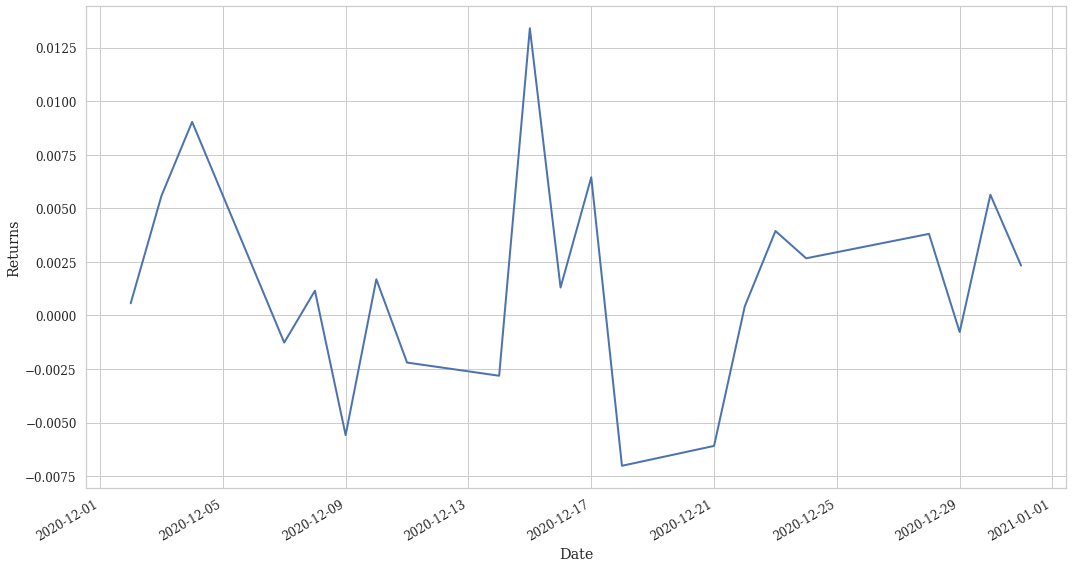

In [9]:
fig, ax = portfolio.plot_returns()

## Portfolio cumulative Returns

In [10]:
portfolio.performance['portfolio_cum_returns'].head(3)

,BMOP
Date,
2020-12-02,0.000570
2020-12-03,0.006151
2020-12-04,0.015243


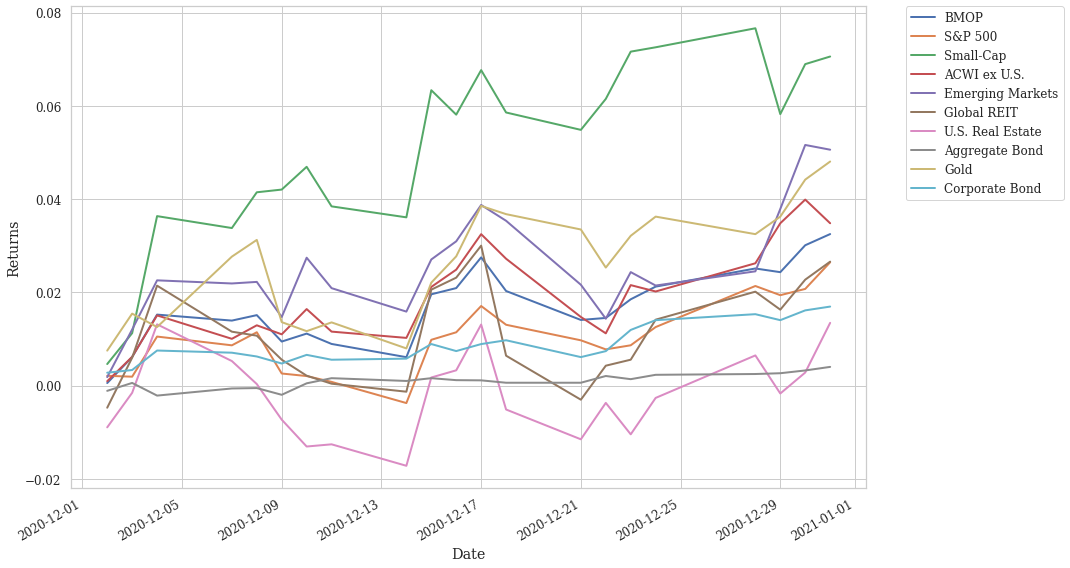

In [11]:
fig, ax = portfolio.plot_cum_returns()

## Distributions of Portfolio Returns

In [12]:
portfolio.performance['portfolio_assets_returns'].describe()

,BMOP,S&P 500,Small-Cap,ACWI ex U.S.,Emerging Markets,Global REIT,U.S. Real Estate,Aggregate Bond,Gold,Corporate Bond
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.001537,0.001257,0.003301,0.001650,0.002383,0.001295,0.000681,0.000192,0.002266,0.000803
std,0.004987,0.005160,0.010080,0.006200,0.007944,0.009623,0.009558,0.001183,0.007597,0.002018
min,-0.007013,-0.008748,-0.017096,-0.012156,-0.013248,-0.022907,-0.017986,-0.002714,-0.017094,-0.003576
25%,-0.001264,-0.001923,-0.002466,-0.003461,-0.003261,-0.003785,-0.006770,-0.000509,-0.002835,-0.000806
50%,0.001305,0.000868,0.003801,0.002870,0.001841,0.001282,0.000476,0.000169,0.003642,0.000808
75%,0.003943,0.003877,0.007417,0.005928,0.010189,0.006708,0.007900,0.000933,0.007522,0.002068
max,0.013401,0.013613,0.026310,0.010815,0.013216,0.021907,0.019263,0.002466,0.014914,0.004510


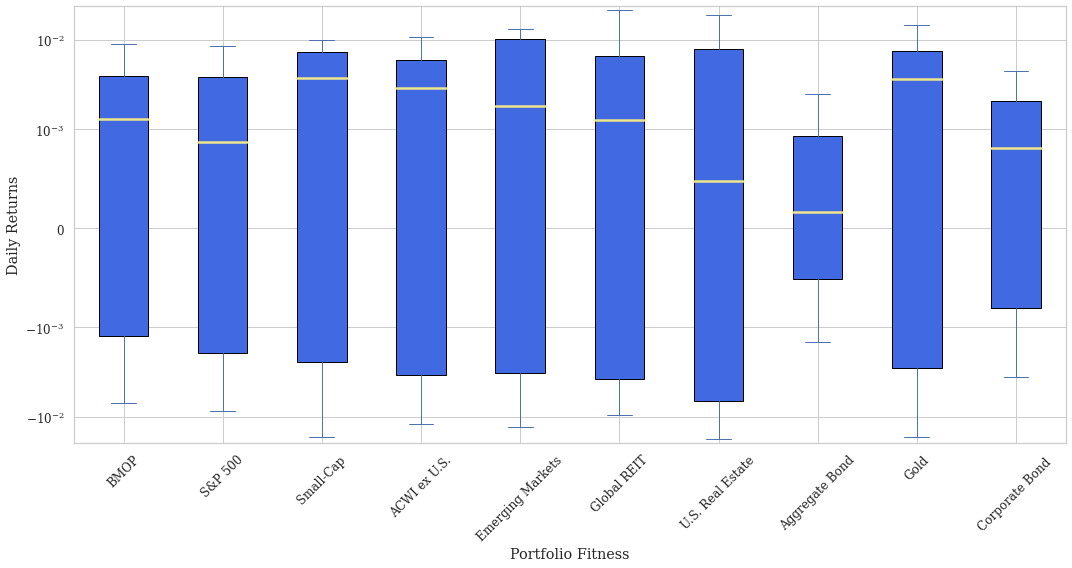

In [13]:
fig, ax = portfolio.plot_dist_returns()

## Relationships of Returns

In [14]:
# Cov Data
portfolio.performance['portfolio_assets_returns'].cov()

,BMOP,S&P 500,Small-Cap,ACWI ex U.S.,Emerging Markets,Global REIT,U.S. Real Estate,Aggregate Bond,Gold,Corporate Bond
BMOP,2.486880e-05,2.211529e-05,0.000041,0.000024,2.864079e-05,4.277617e-05,0.000039,2.248921e-07,0.000020,6.896125e-06
S&P 500,2.211529e-05,2.662151e-05,0.000035,0.000018,1.985189e-05,3.634402e-05,0.000038,-2.719745e-07,0.000019,5.916706e-06
Small-Cap,4.070833e-05,3.529520e-05,0.000102,0.000033,3.353897e-05,7.160085e-05,0.000064,-2.231000e-06,0.000016,1.425518e-05
ACWI ex U.S.,2.373242e-05,1.778868e-05,0.000033,0.000038,4.392519e-05,3.544314e-05,0.000023,-1.154675e-06,0.000016,7.637709e-06
Emerging Markets,2.864079e-05,1.985189e-05,0.000034,0.000044,6.311371e-05,3.506579e-05,0.000022,5.175486e-07,0.000030,9.090831e-06
Global REIT,4.277617e-05,3.634402e-05,0.000072,0.000035,3.506579e-05,9.260063e-05,0.000085,3.885002e-07,0.000018,9.681734e-06
U.S. Real Estate,3.869322e-05,3.802988e-05,0.000064,0.000023,2.233169e-05,8.542993e-05,0.000091,1.068984e-06,0.000016,7.606027e-06
Aggregate Bond,2.248921e-07,-2.719745e-07,-0.000002,-0.000001,5.175486e-07,3.885002e-07,0.000001,1.398482e-06,0.000003,-3.705078e-07
Gold,2.003194e-05,1.946172e-05,0.000016,0.000016,3.033148e-05,1.843098e-05,0.000016,2.678672e-06,0.000058,4.173724e-06
Corporate Bond,6.896125e-06,5.916706e-06,0.000014,0.000008,9.090831e-06,9.681734e-06,0.000008,-3.705078e-07,0.000004,4.073718e-06


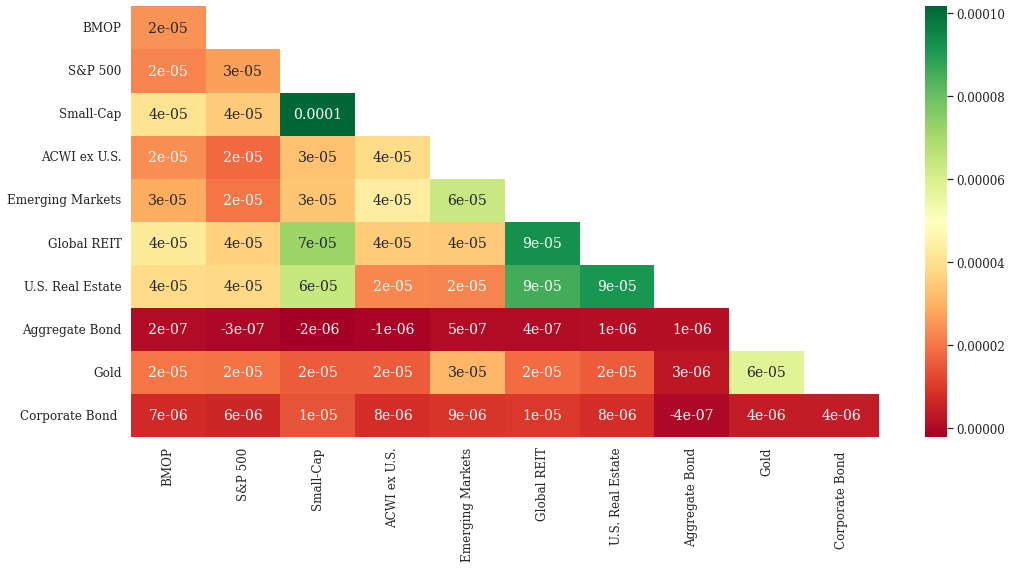

In [15]:
# Cov plot
fig, ax = portfolio.plot_cov()

In [16]:
# Corr Data
portfolio.performance['portfolio_assets_returns'].corr()

,BMOP,S&P 500,Small-Cap,ACWI ex U.S.,Emerging Markets,Global REIT,U.S. Real Estate,Aggregate Bond,Gold,Corporate Bond
BMOP,1.000000,0.859506,0.809862,0.767608,0.722929,0.891390,0.811757,0.038135,0.528757,0.685145
S&P 500,0.859506,1.000000,0.678664,0.556099,0.484310,0.731998,0.771129,-0.044574,0.496507,0.568157
Small-Cap,0.809862,0.678664,1.000000,0.527308,0.418835,0.738187,0.661182,-0.187166,0.204551,0.700701
ACWI ex U.S.,0.767608,0.556099,0.527308,1.000000,0.891818,0.594087,0.383388,-0.157491,0.336377,0.610369
Emerging Markets,0.722929,0.484310,0.418835,0.891818,1.000000,0.458685,0.294089,0.055088,0.502565,0.566952
Global REIT,0.891390,0.731998,0.738187,0.594087,0.458685,1.000000,0.928799,0.034139,0.252117,0.498483
U.S. Real Estate,0.811757,0.771129,0.661182,0.383388,0.294089,0.928799,1.000000,0.094572,0.220214,0.394259
Aggregate Bond,0.038135,-0.044574,-0.187166,-0.157491,0.055088,0.034139,0.094572,1.000000,0.298162,-0.155229
Gold,0.528757,0.496507,0.204551,0.336377,0.502565,0.252117,0.220214,0.298162,1.000000,0.272200
Corporate Bond,0.685145,0.568157,0.700701,0.610369,0.566952,0.498483,0.394259,-0.155229,0.272200,1.000000


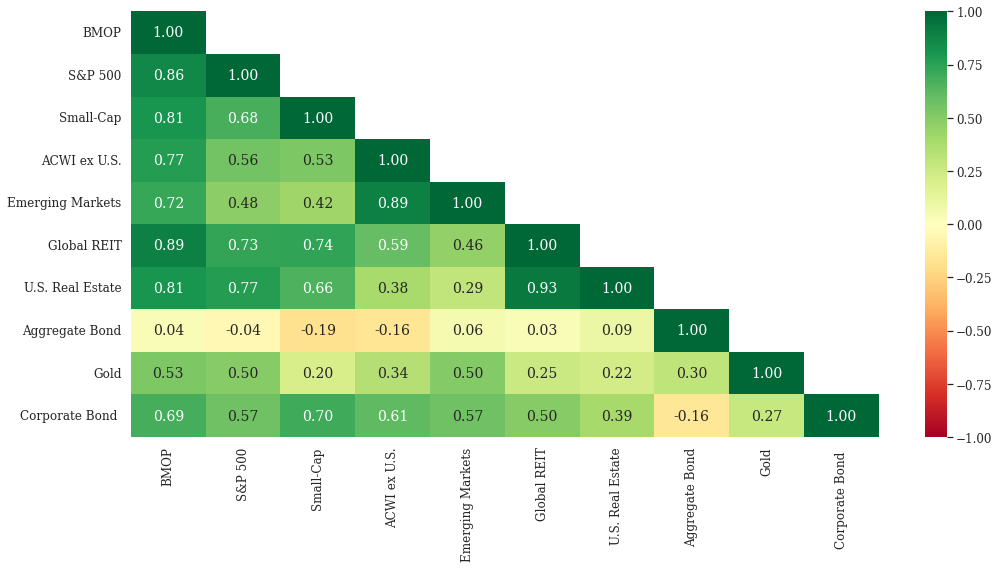

In [17]:
# Corr plot
fig, ax = portfolio.plot_corr()

## Expected Returns vs. Volatility

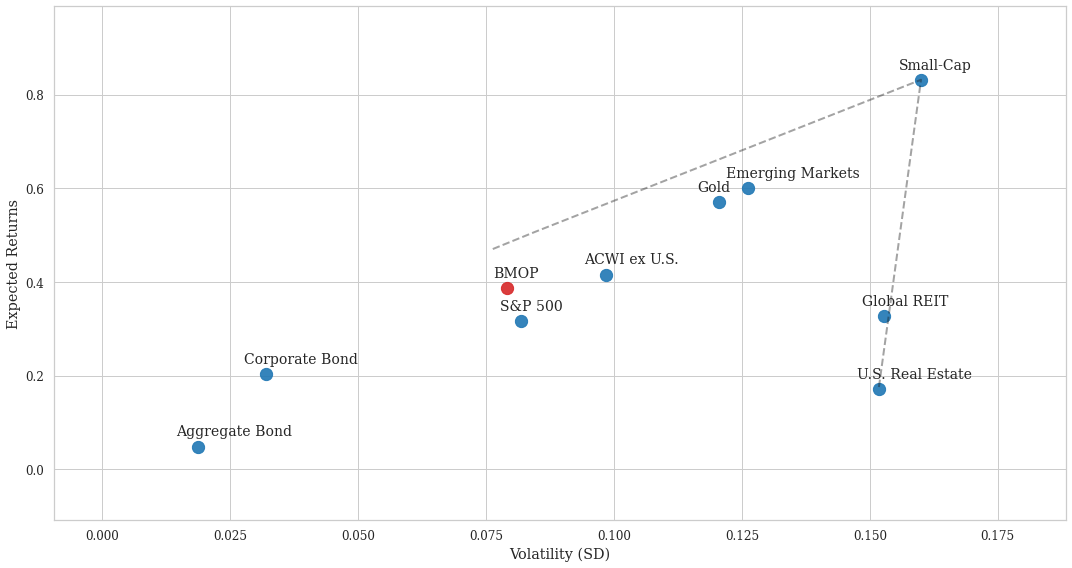

In [18]:
fig, ax = portfolio.plot_mean_sd()